# Paul's EDA

In [86]:
import pandas as pd
import numpy as np

from pyprojroot import here
import wandb

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download the latest data
run = wandb.init()
artifact = run.use_artifact('w207-predictive-maintenance/predictive-maintenance/ai4i2020:v0', type='dataset')
artifact_dir = artifact.download(here('data'))

wandb:   14 of 14 files downloaded.  


In [12]:
X_train = pd.read_csv(here('data/processed/X_train.csv'))
print("X_train:")
print(X_train.describe())
print()
Y_train = pd.read_csv(here('data/processed/Y_train.csv'))
print("Y_train")
print(Y_train.describe())

X_train:
       quality_variation  Air temperature  Process temperature  \
count        7499.000000      7499.000000          7499.000000   
mean            0.498066       300.002854           310.005347   
std             0.669290         2.005323             1.484268   
min             0.000000       295.300000           305.700000   
25%             0.000000       298.300000           308.800000   
50%             0.000000       300.100000           310.100000   
75%             1.000000       301.500000           311.100000   
max             2.000000       304.500000           313.800000   

       Rotational speed       Torque    Tool wear  
count       7499.000000  7499.000000  7499.000000  
mean        1537.916789    40.039725   108.030004  
std          180.646539     9.970724    63.685869  
min         1181.000000     3.800000     0.000000  
25%         1422.000000    33.300000    53.000000  
50%         1502.000000    40.100000   108.000000  
75%         1610.000000    46.90

In [104]:
# Look at the distinct types of labels across all columns
unique_labels = Y_train.value_counts()

# Get index one-hot encoding as a numpy array of tuples
one_hot_array_of_tuples = unique_labels.index.to_numpy()

# Convert to a 2D array
one_hot_array = np.array([list(index_element) for index_element in one_hot_array_of_tuples])

# Get the label names as an array
label_names = np.array(unique_labels.index.names)

# Filter the label names by the one-hot encoding for each row and list as a string
row_label_names = [str(label_names[one_hot_row == 1]) for one_hot_row in one_hot_array]

# Re-index the data
unique_labels.index = row_label_names

print(unique_labels)

[]                                       7241
['Machine failure' 'HDF']                  78
['Machine failure' 'PWF']                  61
['Machine failure' 'OSF']                  48
['Machine failure' 'TWF']                  32
['RNF']                                    13
['Machine failure' 'PWF' 'OSF']             9
['Machine failure' 'HDF' 'OSF']             6
['Machine failure']                         4
['Machine failure' 'HDF' 'PWF']             3
['Machine failure' 'TWF' 'OSF']             2
['Machine failure' 'TWF' 'RNF']             1
['Machine failure' 'TWF' 'PWF' 'OSF']       1
Name: count, dtype: int64


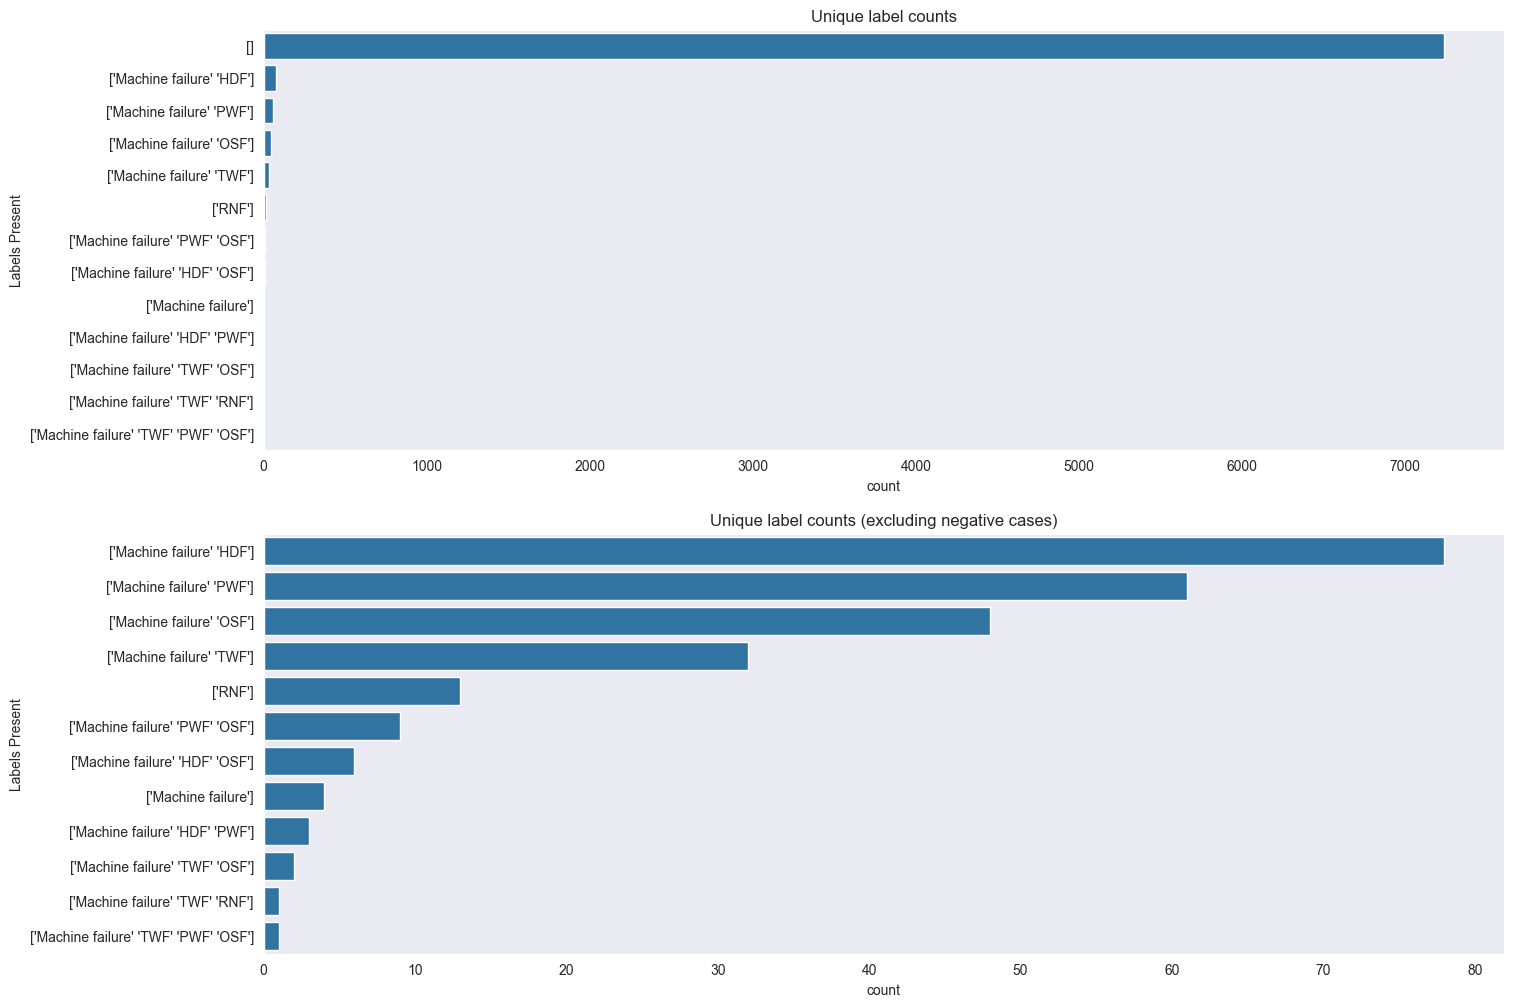

In [103]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows=2, figsize=(16,12))

sns.barplot(unique_labels, orient='h', ax=ax[0])
ax[0].set_title("Unique label counts")
ax[0].set_ylabel("Labels Present")

sns.barplot(unique_labels[1:], orient='h', ax=ax[1])
ax[1].set_title("Unique label counts (excluding negative cases)")
ax[1].set_ylabel("Labels Present")

plt.show()